**Describe the problem you want to solve using data science techniques. Why is it important? How your ML model can help (e.g., reduce costs, increase quality, etc.)? (6 points)**


**Load the data using pandas and split the data frame into X (inputs) and y (outputs). (2 points)**


**Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. (7 points)**


**Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options for target variables, you can select some of them after this step with a couple of sentences explaining your choice. (6 points).**


**Build a proper cross-validation procedure; select an appropriate measure of quality (the selection of both things should be motivated by your data). Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction (9 points).**


**Analyze the obtained results (interesting findings, remarks on ML experiments, the applicability of the model in a real-life scenario) and make an overall conclusion. Does your model solve the problem stated at the beginning? Can you estimate the impact of your ML model on the problem domain (10 points)?** 

**Also, we'll estimate the structure and clarity of your presentations (10 points)**

1) Describe the problem you want to solve using data science techniques. Why is it important? How your ML model can help (e.g., reduce costs, increase quality, etc.)?

Road traffic collisions are the number one killer of children and young adults ages 5-29, and 8th leading cause of death worldwide. Post-crash care is one of the five pillars of road safety and a critical component for reducing morbidity and mortality.

When it comes to emergency response to road accidents, every second counts. With heavy traffic patterns and the unique layout of the city, finding the best locations to position emergency responders throughout the day as they wait to be called is critical in a city like Nairobi.


Our model can help reduce the number of seconds for first aid to road traffic accident victims.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
!pip install geopandas
import geopandas as gpd # For loading the map of road segments

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.5MB/s 
     |████████████████████████████████| 14.8MB 295kB/s 


# Starter Notebook

The goal of this notebook is to provide a brief introduction to the challenge and the data associated with it. It won't go into detail on a solution approach since this is a challenge which may be approached in a number of ways.

# The Challenge

The main dataset for this challenge (in Train.csv) is a record of crashes within Nairobi over 2018-19. Each crash has an associated datetime and location. Let's load the data and take a look.

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/My Drive/uber/Train.csv', parse_dates=['datetime'])
print(df.shape)
df.head()

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


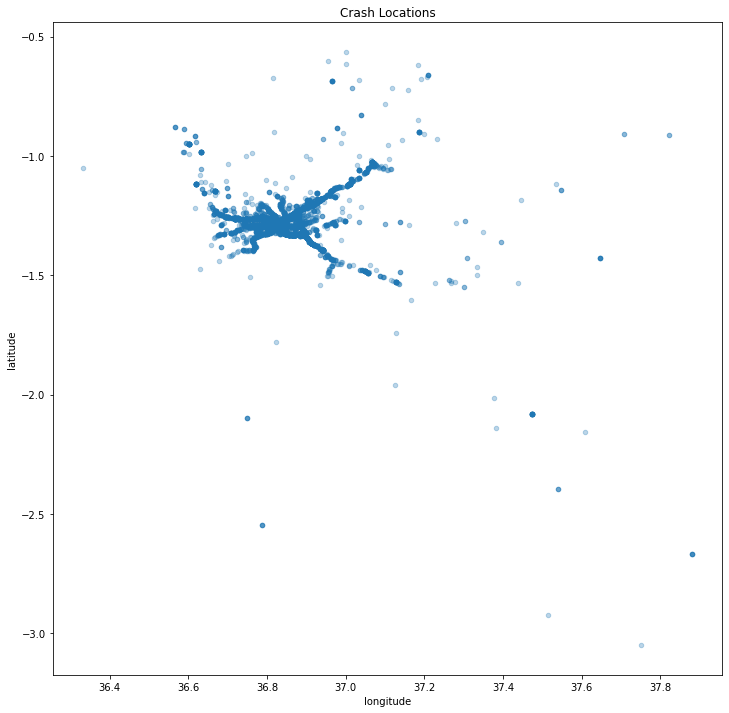

In [ ]:
# Plot the crashes
df.plot(x='longitude', y='latitude', kind='scatter', figsize=(12, 12), alpha=0.3, title='Crash Locations')

Rather than trying to predict accident locations or the number of accidents in a given timeframe, we are instead asked to come up with an ambulance deployment schedule that will minimise distance travelled. 

This is of course a simplification of the problem, but by solving this you will hopefully develop strategies that can be used going forward.

In [ ]:
# View the submission format
ss = pd.read_csv('/content/drive/My Drive/uber/SampleSubmission.csv', parse_dates=['date'])
ss.head()

,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-07-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-07-01 06:00:00,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-07-01 09:00:00,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-07-01 12:00:00,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ss.shape[0]/8

184.0

# Scoring

You can re-create the scoring process by creating your own test set and using the following function:

In [ ]:
def score(sub, ref):
    total_distance = 0
    for date, c_lat, c_lon in ref[['datetime', 'latitude', 'longitude']].values:
        row = sub.loc[sub.date < date].tail(1) # Prior to Oct 2 this was incorrectly .head(1)
        dists = []
        for a in range(6):
            dist = ((c_lat - row[f'A{a}_Latitude'].values[0])**2+(c_lon - row[f'A{a}_Longitude'].values[0])**2)**0.5 
            dists.append(dist)
        total_distance += min(dists)
    return total_distance


In [ ]:
# Example:

# Test set
reference = df.loc[df.datetime > '2019-01-01'] # Using 2019 as our test set

# Date rane covering test set
dates = pd.date_range('2019-01-01', '2020-01-01', freq='3h')

# Create submission dataframe
sub = pd.DataFrame({
    'date':dates
})

for ambulance in range(6):
    sub['A'+str(ambulance)+'_Latitude'] = 0
    sub['A'+str(ambulance)+'_Longitude'] = 0

# Place an ambulance in the center of the city:
sub['A'+str(ambulance)+'_Latitude'] = 36.82
sub['A'+str(ambulance)+'_Longitude'] = -1.3



score(sub, reference)

70886.38526378157

This scoring function can be used for local testing without needing to submit on Zindi. Lower is better. Experiment with specifying set locations for all 6 ambulances, and see how low you can get your score.

# Weather Data

Some weatehr variables form the GFS dataset are provided, covering the greater Nairobi area. Let's take a quick look at the dataset before moving on:

In [ ]:
weather = pd.read_csv('/content/drive/My Drive/uber/Weather_Nairobi_Daily_GFS.csv', parse_dates=['Date'])
weather.head()

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


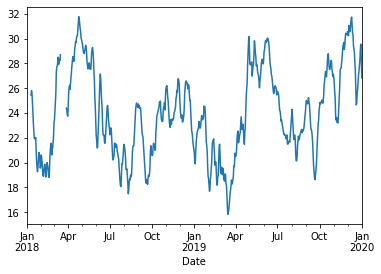

In [ ]:
# Interestingly, Kenya has two rainy seasons per year!
weather.set_index('Date')['precipitable_water_entire_atmosphere'].rolling(10).mean().plot()

# Road Survey Data

The road survey data contains many different measurements for each surveyed road segment. Unfortunately we can't access the raw data, and must work 'in the dark' in terms of what the column headings mean. However, the naming convention does at least show which columns may be related.

To locate the road segments geographically, a geojson file is provided. Here is an example of merging the survey data with the segments and visualizing the result.

In [ ]:
# Load the survey data
road_surveys = pd.read_csv('/content/drive/My Drive/uber/Segment_info.csv')
road_surveys.head()

,segment_id,side,25_48,79_76,79_65,79_39,28_78_50,55_90,26_76,92_30,62_51,62_51_27,50_98,34_90,72_35,44,44_91,73_29,82,36,87_53,95_64,95_64_46,95_64_80,95_86_50,60_86_50,78_73,75,75_74,81_38,89_84,89_85_47,54_84,54_85_47,71_22,23_90,69_33,68_43,80_65,80_52_65,...,63_40_45_20,63_40_45_21,49_65_0,49_65_2,49_65_4,49_65_10,49_65_11,49_65_13,49_65_14,49_65_16,49_65_17,49_65_18,49_65_19,49_65_20,49_65_21,49_39_0,49_39_2,49_39_4,49_39_10,49_39_11,49_39_13,49_39_14,49_39_16,49_39_17,49_39_18,49_39_19,49_39_20,49_39_21,80_97_61_65_0,80_97_61_65_10,80_97_61_65_11,80_97_61_65_12,80_97_61_65_15,80_97_61_65_16,80_97_61_39_0,80_97_61_39_10,80_97_61_39_11,80_97_61_39_12,80_97_61_39_15,80_97_61_39_16
0,176_2,1,3,0,3,3,0.0,11,0,1,1,1,3,1,NaN,1,NaN,1,2,3,0,1,1,1,0,0.0,0,1,NaN,1,0,1,0,1,3,1,4,0,7,1.0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,176_2,2,3,0,3,3,0.0,11,0,1,1,1,3,1,NaN,1,NaN,2,2,3,0,1,1,1,0,0.0,0,1,NaN,1,0,1,0,1,4,1,4,0,6,1.0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,95_1,1,3,0,3,3,0.0,14,0,3,2,2,2,1,NaN,1,NaN,2,1,3,1,1,1,1,0,0.0,1,1,NaN,1,0,0,1,0,4,2,2,0,5,NaN,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95_1,2,3,0,3,3,0.0,14,0,3,2,3,2,1,NaN,1,NaN,2,1,3,1,1,1,1,0,0.0,1,1,NaN,1,0,0,0,0,4,2,3,1,5,NaN,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144_7,1,1,0,4,3,0.0,5,0,3,1,1,2,1,NaN,1,NaN,1,1,2,1,2,1,1,0,0.0,0,1,NaN,1,0,1,1,0,4,2,1,0,4,1.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Load the map
road_segment_locs = gpd.read_file('/content/drive/My Drive/uber/segments_geometry.geojson')
road_segment_locs.head()

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."


In [ ]:
len(road_segment_locs.road_name.unique())

157

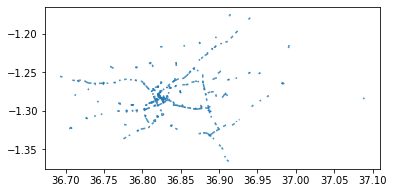

In [ ]:
# Because this is a geodataframe, we can plot it
road_segment_locs.plot()

In [ ]:
road_segment_locs_crs = road_segment_locs.to_crs(epsg=3857)

In [ ]:
road_segment_locs.head()

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."


In [ ]:
road_segment_locs_crs.head()

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (4099454.818 -142998.625, 4099457.0..."
1,137_1,accra road-tertiary,"LINESTRING (4099513.418 -142913.684, 4099516.3..."
2,137_2,accra road-tertiary,"LINESTRING (4099574.739 -142823.112, 4099577.5..."
3,1_1,airport north road-primary,"LINESTRING (4106181.731 -148384.977, 4106185.7..."
4,1_2,airport north road-primary,"LINESTRING (4106270.632 -148319.901, 4106274.6..."


In [ ]:
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 18.1MB 232kB/s 


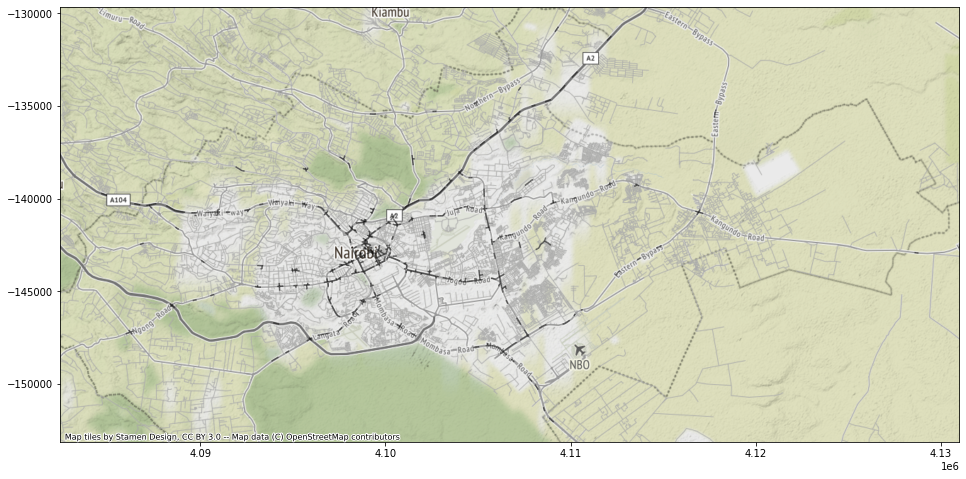

In [ ]:
ax = road_segment_locs_crs.plot(figsize=(20, 8), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

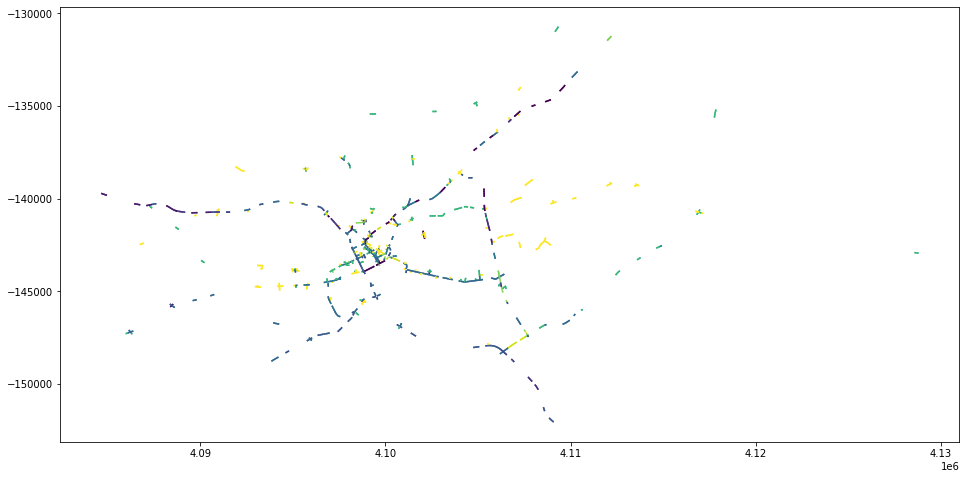

In [ ]:
# Let's merge the two and color by one of the survey columns
segments_merged = pd.merge(road_segment_locs_crs, road_surveys, on='segment_id', how='left')
segments_merged.plot(column='55_90', figsize=(20, 8))

This data will come in useful if you're trying to predict the number of crashes along a particular road, or within a specified region. 

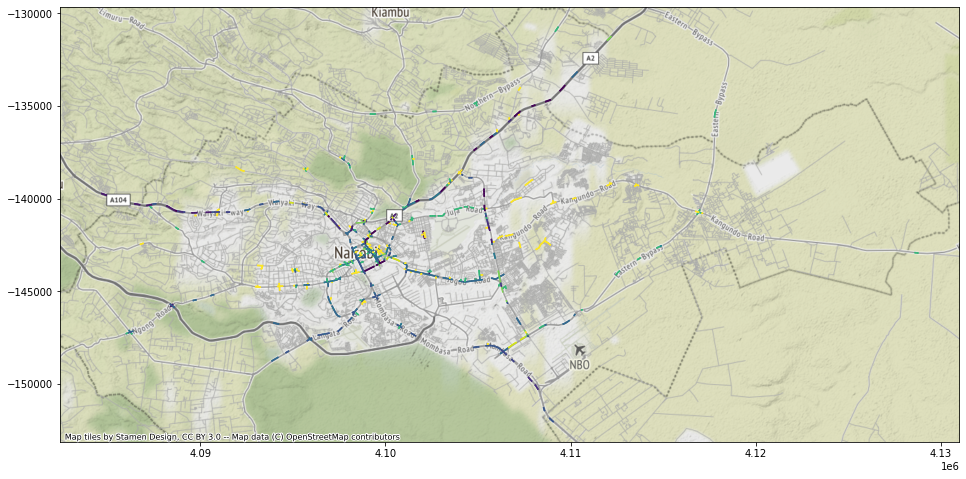

In [ ]:
ax = segments_merged.plot(figsize=(20, 8), alpha=1, edgecolor='k',column='55_90')
ctx.add_basemap(ax)

In [ ]:
df.head()

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf = gdf.set_crs(epsg=4326)
gdf.head()

,uid,datetime,latitude,longitude,geometry
0,1,2018-01-01 00:25:46,-1.188850,36.931382,POINT (36.93138 -1.18885)
1,2,2018-01-01 02:02:39,-0.662939,37.208730,POINT (37.20873 -0.66294)
2,3,2018-01-01 02:31:49,-0.662939,37.208730,POINT (37.20873 -0.66294)
3,4,2018-01-01 03:04:01,-1.288087,36.826583,POINT (36.82658 -1.28809)
4,5,2018-01-01 03:58:49,-1.188850,36.931382,POINT (36.93138 -1.18885)


In [ ]:
# set format for representing on map
# Load the data using pandas and split the data frame into X (inputs) and y (outputs). (2 points)
df_crs = gdf.to_crs(epsg=3857)
df_crs_clipped = df_crs[(df_crs.geometry.x > 4060000) & (df_crs.geometry.x < 4137000) &  (df_crs.geometry.y < -110000) &  (df_crs.geometry.y > -175000)]
df_crs_clipped_more = df_crs[(df_crs.geometry.x > 4080000) & (df_crs.geometry.x < 4130000) &  (df_crs.geometry.y < -112000) &  (df_crs.geometry.y > -167000)]
df_crs.shape, df_crs_clipped.shape, df_crs_clipped_more.shape

((6318, 5), (6114, 5), (6015, 5))

In [ ]:
6015/6318

0.9520417853751187

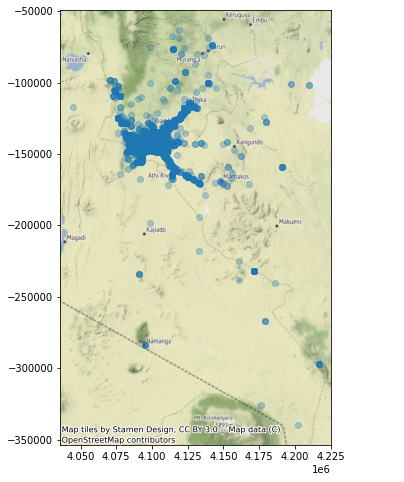

In [ ]:

ax = df_crs.plot(figsize=(20, 8), alpha=0.3)
ctx.add_basemap(ax)

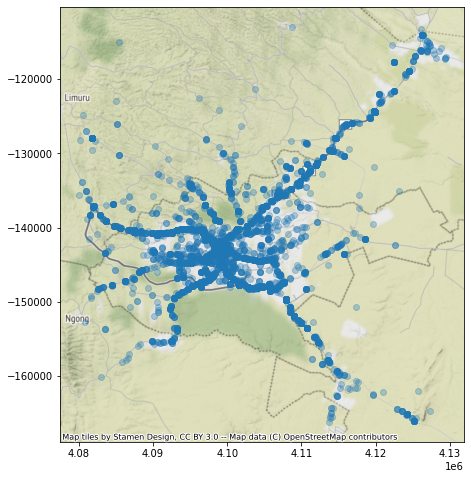

In [ ]:

ax = df_crs_clipped_more.plot(figsize=(20, 8), alpha=0.3)
ctx.add_basemap(ax)

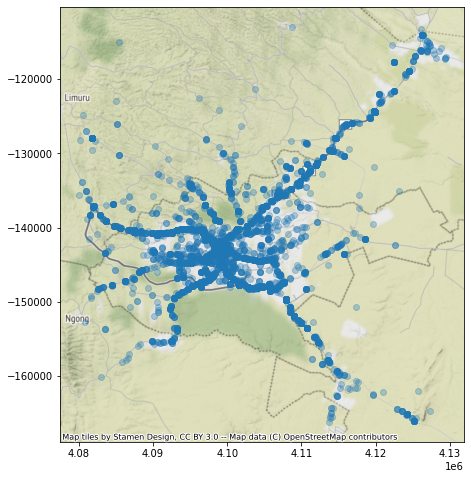

In [ ]:
ax = df_crs_clipped_more.plot(figsize=(20, 8), alpha=0.3)
ctx.add_basemap(ax)

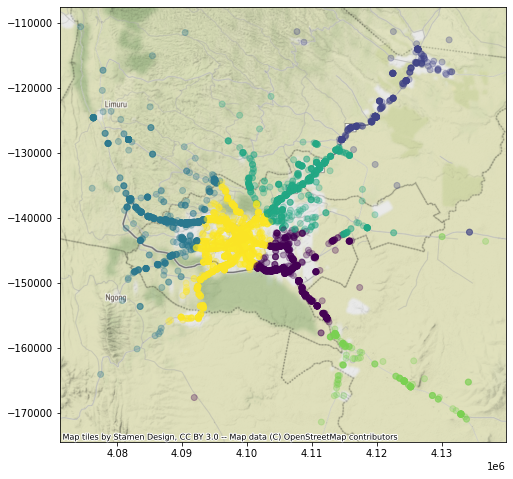

In [ ]:
from sklearn.cluster import KMeans
km_fit = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped[["longitude", "latitude"]])
y_pred = km_fit.predict(df_crs_clipped[["longitude", "latitude"]])
ax = df_crs_clipped.plot(figsize=(20, 8), alpha=0.3, c=y_pred)
ctx.add_basemap(ax)

#w/o outlier
km_fit_wo = KMeans(n_clusters=6, random_state=42).fit(df_crs[["longitude", "latitude"]])
y_pred_wo = km_fit_wo.predict(df_crs[["longitude", "latitude"]])

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components = 6, covariance_type='full', random_state=42)
gmm.fit(df_crs_clipped_more[["longitude", "latitude"]])
y_pred= gmm.predict(df_crs_clipped_more[["longitude", "latitude"]])

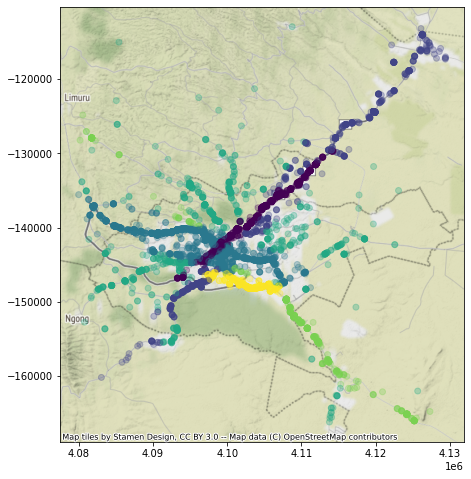

In [ ]:
ax = df_crs_clipped_more.plot(figsize=(20, 8), alpha=0.3, c=y_pred)
ctx.add_basemap(ax)

In [ ]:
reference = df_crs.loc[df.datetime > '2019-01-01'] # Using 2019 as our test set
# Create submission dataframe

# Date rane covering test set
dates = pd.date_range('2019-01-01', '2020-01-01', freq='3h')
sub = pd.DataFrame({
    'date':dates
})
gmm.
for ambulance in range(6):
    sub['A'+str(ambulance)+'_Latitude'] = sub.apply(lambda x: gmm.cluster_centers_[ambulance][1], axis=1)
    sub['A'+str(ambulance)+'_Longitude'] = sub.apply(lambda x: gmm.cluster_centers_[ambulance][0], axis=1)


sub.head()
print("This is score with outliers")
score(sub, reference)

SyntaxError: ignored

In [ ]:
km3 = KMeans(n_clusters=6, random_state=42, precompute_distances=True).fit(df_crs_clipped_more[["longitude", "latitude"]])
y_pred = km3.predict(df_crs_clipped_more[["longitude", "latitude"]])
ax = df_crs_clipped_more.plot(figsize=(20, 8), alpha=0.3, c=y_pred)
ctx.add_basemap(ax)

In [ ]:
km_fit.cluster_centers_

In [ ]:
reference = df_crs.loc[df.datetime > '2019-01-01'] # Using 2019 as our test set
# Create submission dataframe

# Date rane covering test set
dates = pd.date_range('2019-01-01', '2020-01-01', freq='3h')
sub = pd.DataFrame({
    'date':dates
})

for ambulance in range(6):
    sub['A'+str(ambulance)+'_Latitude'] = sub.apply(lambda x: km_fit.cluster_centers_[ambulance][1], axis=1)
    sub['A'+str(ambulance)+'_Longitude'] = sub.apply(lambda x: km_fit.cluster_centers_[ambulance][0], axis=1)


sub.head()


In [ ]:
sub.to_csv('/content/submission.csv')

In [ ]:
score(sub, reference)

In [ ]:
reference = df_crs.loc[df.datetime > '2019-01-01'] # Using 2019 as our test set
# Create submission dataframe

# Date rane covering test set
dates = pd.date_range('2019-01-01', '2020-01-01', freq='3h')
sub = pd.DataFrame({
    'date':dates
})

for ambulance in range(6):
    sub['A'+str(ambulance)+'_Latitude'] = sub.apply(lambda x: km_fit_wo.cluster_centers_[ambulance][1], axis=1)
    sub['A'+str(ambulance)+'_Longitude'] = sub.apply(lambda x: km_fit_wo.cluster_centers_[ambulance][0], axis=1)


sub.head()
print("This is score with outliers")
score(sub, reference)

In [ ]:
reference = df_crs.loc[df.datetime > '2019-01-01'] # Using 2019 as our test set
# Create submission dataframe

# Date rane covering test set
dates = pd.date_range('2019-01-01', '2020-01-01', freq='3h')
sub = pd.DataFrame({
    'date':dates
})

for ambulance in range(6):
    sub['A'+str(ambulance)+'_Latitude'] = sub.apply(lambda x: km3.cluster_centers_[ambulance][1], axis=1)
    sub['A'+str(ambulance)+'_Longitude'] = sub.apply(lambda x: km3.cluster_centers_[ambulance][0], axis=1)


sub.head()
print("This is score with 6000 training data")
score(sub, reference)

In [ ]:
sub.to_csv('/content/submission.csv')

In [ ]:
#Seasonal approach
df_crs_clipped_q1 = df_crs_clipped[df_crs_clipped.datetime.dt.month <= 3]
df_crs_clipped_q2 = df_crs_clipped[(df_crs_clipped.datetime.dt.month <= 6) & (df_crs_clipped.datetime.dt.month > 3)]
df_crs_clipped_q3 = df_crs_clipped[(df_crs_clipped.datetime.dt.month <= 9) & (df_crs_clipped.datetime.dt.month > 6)]
df_crs_clipped_q4 = df_crs_clipped[(df_crs_clipped.datetime.dt.month <= 12) & (df_crs_clipped.datetime.dt.month > 9)]

In [ ]:
from sklearn.cluster import KMeans
km_fit_q1 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_q1[["longitude", "latitude"]])
km_fit_q2 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_q2[["longitude", "latitude"]])
km_fit_q3 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_q3[["longitude", "latitude"]])
km_fit_q4 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_q4[["longitude", "latitude"]])

In [ ]:
reference = df_crs.loc[df.datetime > '2019-01-01'] # Using 2019 as our test set
# Create submission dataframe

# Date rane covering test set
dates = pd.date_range('2019-01-01', '2020-01-01', freq='3h')
sub = pd.DataFrame({
    'date':dates
})

quartal_centroids = [km_fit_q1.cluster_centers_, km_fit_q2.cluster_centers_,km_fit_q3.cluster_centers_,km_fit_q4.cluster_centers_]
def quartal_clustering(ambulance, axis):
  def inner_quartal_clustering(row):
    quartal = (row.date.month - 1) // 4
    return quartal_centroids[quartal][ambulance][axis]
  return inner_quartal_clustering

for ambulance in range(6):
    sub['A'+str(ambulance)+'_Latitude'] = sub.apply(quartal_clustering(ambulance, 1), axis=1)
    sub['A'+str(ambulance)+'_Longitude'] = sub.apply(quartal_clustering(ambulance, 0), axis=1)


sub.tail()


In [ ]:
score(sub, reference)

In [ ]:
sub.to_csv('/content/submission.csv')

### Daily approach

In [ ]:
#Seasonal approach
df_crs_clipped_night = df_crs_clipped[df_crs_clipped.datetime.dt.hour <= 6]
df_crs_clipped_morning = df_crs_clipped[(df_crs_clipped.datetime.dt.hour <= 12) & (df_crs_clipped.datetime.dt.hour > 6)]
df_crs_clipped_day = df_crs_clipped[(df_crs_clipped.datetime.dt.hour <= 18) & (df_crs_clipped.datetime.dt.hour > 12)]
df_crs_clipped_evening = df_crs_clipped[(df_crs_clipped.datetime.dt.hour <= 24) & (df_crs_clipped.datetime.dt.hour > 18)]

In [ ]:
from sklearn.cluster import KMeans
km_fit_q1 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_night[["longitude", "latitude"]])
km_fit_q2 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_morning[["longitude", "latitude"]])
km_fit_q3 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_day[["longitude", "latitude"]])
km_fit_q4 = KMeans(n_clusters=6, random_state=42).fit(df_crs_clipped_evening[["longitude", "latitude"]])

In [ ]:
reference = df_crs.loc[df.datetime > '2019-01-01'] # Using 2019 as our test set
# Create submission dataframe

# Date rane covering test set
dates = pd.date_range('2019-01-01', '2020-01-01', freq='3h')
sub = pd.DataFrame({
    'date':dates
})

daily_centroids = [km_fit_night.cluster_centers_, km_fit_morning.cluster_centers_,km_fit_day.cluster_centers_,km_fit_night.cluster_centers_]
def quartal_clustering(ambulance, axis):
  def inner_quartal_clustering(row):
    quartal = (row.date.hour - 1) // 6
    return quartal_centroids[quartal][ambulance][axis]
  return inner_quartal_clustering

for ambulance in range(6):
    sub['A'+str(ambulance)+'_Latitude'] = sub.apply(quartal_clustering(ambulance, 1), axis=1)
    sub['A'+str(ambulance)+'_Longitude'] = sub.apply(quartal_clustering(ambulance, 0), axis=1)


sub.tail()


In [ ]:
score(sub, reference)

# Adding Uber Data

You can access speed data from https://movement.uber.com/explore/nairobi/speeds and clicking 'Download Data'. Here we'll load in the speeds from January 2019 and explore the data briefly.

In [ ]:
speeds = pd.read_csv('/content/movement-speeds-hourly-nairobi-2019-1.csv', parse_dates=['utc_timestamp'])
speeds.head()

In [ ]:
# Plot speeds over time for a specific OSM way
way = speeds.loc[speeds.osm_way_id == 133901081]
way = way.set_index('utc_timestamp')
way.resample('1h').mean().plot(y='speed_kph_mean')

In [ ]:
way.resample('1D').mean().plot(y='speed_kph_mean')

You can use any and all data available through Uber Movement, including linking the speeds data to OSM segments, downloading quarterly statistics, using the Movement Data Toolkit etc.

You can find much more info about working with the speeds data here: https://medium.com/uber-movement/working-with-uber-movement-speeds-data-cc01d35937b3 - including how to link the segment_id with OSM data

# What Next?

There are many ways you could approach this challenge. For example, you could:
- Create a model to predict the liklihood of an accident given a location, the features of the nearby road segments, the weather, the traffic speed and the time of day
- Use this model to predict the probability of crashes for different times+locations over the test period, and then sample from this probability distribution to generate plausible crash locations.
- Use an optimization technique to minimise the travel distance for the ambulances to your fake crash points. 

This might seem too complicated - perhaps simply picking 6 fixed locations based on the existing data will be enough? Or maybe it's worth setting separate locations during busy traffic times? 

Perhaps a Reinforcement Learning aproach will do well? 

Or maybe you can see a totally different way to solve this!

Share your ideas on the discussion boards, and let's see how innovative we can be :)